## **Part II - A Mixture Distribution**

<span style =  'font-family: Times New Roman'>
A mixture distribution admits the following probability density function:   
</span>



<span style = 'font-family:Times New Roman'>


<span style = 'text_align:center;'>
    $f(x) = \frac{1}{4(1 - e^{ -2 } )}xe^{-x^{2}/2}I(0 < x < 2 ) + \frac{3}{4\sqrt{2\pi}}e^{-(x-\mu)^{2} /2},$  $\;\;$  $-\infty < x < \infty$


<span style = 'font-family: Times New Roman'>
where $\mu \in (-\infty, \infty)$ is a parameter. 

### 1. Write R-functions: Density, Distribution, Quantile and Generator.

#### 1.1 R-function for computing density function

<span style = 'text-align: center;'>
$f(x) = \left\{\begin{matrix} 
  \frac{1}{4(1 - e^{ -2 } )}xe^{-x^{2}/2} + \frac{3}{4\sqrt{2\pi}}e^{-(x-\mu)^{2} /2} \quad 0<x<2 \\  
  \frac{3}{4\sqrt{2\pi}}e^{-(x-\mu)^{2} /2} \quad \quad \quad \quad \quad \quad \quad x \ge 2 \space or \space  x \le 0
\end{matrix}\right. $

In [196]:
dfunction = function(a_vector, mu){

# Can be used to calculate density value in terms of the given distribution
#
# Paramters
# ---------
# a_vector: Can be a single value or a list of numbers.
#
#           There is no size limit for the input value.
#
# mu: A parameter of the distribution function
#
# sigma: A parameter of the distribution function
    
# Get the result of indicator function

indicator = ((a_vector > 0) & (a_vector < 2))

density = (1 / (4 * (1 - exp(-2)) ) * a_vector * exp(-(a_vector^2) / 2) 
           * indicator + 3 / (4 * sqrt(2 * pi)) * exp(-((a_vector - mu)^2) / 2))

return(density)
}

#### 1.2 R-function for computing the distribution function


<span style = 'font-family: Times New Roman'>
$\frac{1}{\sqrt{2\pi}}e^{-(x-\mu)^{2} /2} \space$  is the density function of a normal distribution with $\sigma$ = 1.  

$\frac{3}{4\sqrt{2\pi}}e^{-(x-\mu)^{2} /2} = \frac{3}{4}g(x)\space$ where $g(x)$ is the density function of normal distribution with $\sigma=1.$   

$F(x) = \frac{3}{4}G(x) +\frac{1-e^{\frac{-x^2}{2}}}{4(1-e^{-2})}I(0<x<2)+ \frac{1}{4}I(2 \le x) $
<span style = "font-family: Times New Roman">      
G(x) is the distribution function of a normal distribution with $\sigma = 1.$

In [192]:
pfunction = function(a_vector, mu, sigma = 1){
# Can be used to calculate P(X < x)
#
# Paramters
# ---------
# a_vector: Can be a single value or a list of numbers.
#
#           There is no size limit for the input value.
#
# mu: A parameter of the distribution function
#
# sigma: A parameter of the distribution function

# Use indicator function to determine whether include specific term

## 0 < x < 2
indicator1 = ((a_vector > 0) & (a_vector < 2))
## x >= 2 
indicator2 = (a_vector >= 2)
    
first_term = 3/4 * pnorm(a_vector, mu, sigma)
    
second_term = (1 - exp(-a_vector^2 / 2)) / (4 * (1 - exp(-2)))*indicator1
    
third_term = 1/4 * indicator2

result = first_term + second_term + third_term

return(result)

}


#### 1.3 R-function for computing the quantile function

<span style = 'font-family:Times New Roman'>
In this function, we use uniroot() function to solve the equation below:
</span>

<p style="text-align: center;">
$F(x) = Prob$
</p>  

<span style = 'font-family:Times New Roman'>
where $Prob$ is the value entered.
</span>

In [193]:
qfunction_single = function(probability, mu, sigma = 1){
# Can be used to calculate the x value which makes P(X < x) = probability
#
# Paramters
# ---------
# probability: A value ranging from 0 to 1
#
# mu: A parameter of the distribution function
#
# sigma: A parameter of the distribution function

if (probability == 0){return(-Inf)}
if (probability == 1){return(Inf)}
if (probability > 1 | probability < 0){return('Invalid Input')}

pf_zero = pfunction(0, mu)

if (probability <= pf_zero){return(qnorm((4/3) * probability, mu, sigma))}

if (probability > pf_zero & (probability <= pfunction(2, mu))){
    f = function(x, prob = probability, pf_z = pf_zero, m = mu, s = sigma) 3/4 * pnorm(x, m, s) + (1 - exp(-x^2 / 2)) / (4 * (1 - exp(-2))) - prob
    return(uniroot(f, c(0, 2), tol = 1e-16)$root)
}
    
f = function(x, prob = probability, pf_z = pf_zero, m = mu, s = sigma) prob - 1/4 - 3/4 * pnorm(x, m, s)
upper = qnorm(1 - 1e-16, mu, sigma)
return(uniroot(f, c(2, upper), tol = 1e-16)$root)

}

qfunction = function(a_vector, mu, sigma = 1){
# Can be used to calculate the x value which makes P(X < x) = probability
#
# Paramters
# ---------
# a_vector: Can be a single value or a list of numbers.
#
#           Ranging from 0 to 1.
#
# mu: A parameter of the distribution function
#
# sigma: A parameter of the distribution function

result = c()
for (val in a_vector){
    result = append(result, qfunction_single(val, mu))
}
return(result)    
}

#### 1.4 R-function for generating random numbers from the distribution

<span style = 'font-family:Times New Roman'>
We use the following function to generate random numbers from the distribution:
</span>
<p style = 'text-align: center;'>
$X = F^{-1}(U)$
</p>
<span style = 'font-family:Times New Roman'>
where $U\sim U(0,1).$  
    
**Proof**: $P(X<x)=P(F^{-1}(U)<x)=P(U<F(x))=F_U(F(x))$. $U\sim U(0,1).$  
    
Thus, $P(X < x)=F_U(F(x))=F(x)$ $\blacksquare$


In [194]:
rfunction = function(n, mu, sigma = 1){
# Can be used to generate n random numbers from the distribution
#
# Paramters
# ---------
# n: the desired number of random numbers from the distribution
#
# mu: A parameter of the distribution function
#
# sigma: A parameter of the distribution function
uni = runif(n, 0, 1)
result = c()
for (val in uni){
    result = append(result, qfunction(val, mu, sigma))
}
return(result)
}

### Plot density function, distribution function and quantile function for each of $\mu = -2$, 0 and 2.


In [8]:
#Load necessary packages
library(ggplot2)
library(ggpubr)
invisible()

#### Plot for density function for each of $\mu = -2$, 0 and 2.

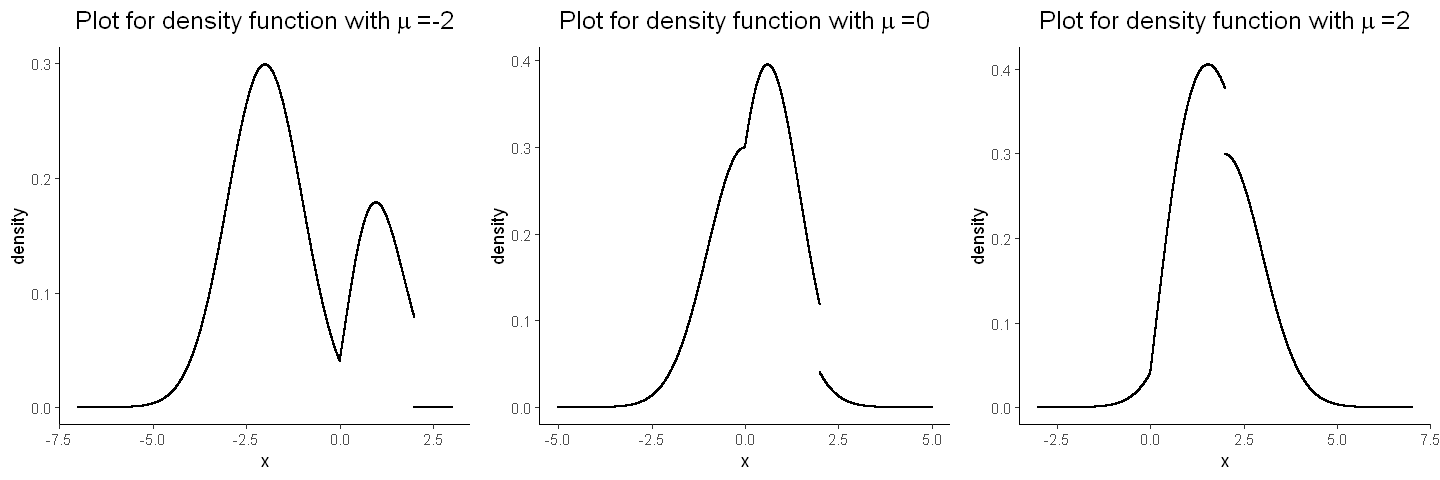

In [205]:
options(repr.plot.width=12, repr.plot.height=4)
x_value1 = seq(-7, 3, by = 0.001)
density1 = dfunction(x_value1, mu = -2)
df1 = as.data.frame(cbind(x_value = x_value1, density = density1))
f1 = ggplot(data = df1, aes(x = x_value, y = density))+
    geom_point(size = 0.25)+
    theme_classic()+
    labs(title = expression('Plot for density function with'~mu~'=-2'), x = 'x')+
    theme(plot.title = element_text(size = 15, hjust = 0.5))

x_value2 = seq(-5, 5, by = 0.001)
density2 = dfunction(x_value2, mu = 0)
df2 = as.data.frame(cbind(x_value = x_value2, density = density2))
f2 = ggplot(data = df2, aes(x = x_value, y = density))+
    geom_point(size = 0.25)+
    theme_classic()+
    labs(title = expression('Plot for density function with'~mu~'=0'), x = 'x')+
    theme(plot.title = element_text(size = 15, hjust = 0.5))

x_value3 = seq(-3, 7, by = 0.001)
density3 = dfunction(x_value3, mu = 2)
df3 = as.data.frame(cbind(x_value = x_value3, density = density3))
f3 = ggplot(data = df3, aes(x = x_value, y = density))+
    geom_point(size = 0.25)+
    theme_classic()+
    labs(title = expression('Plot for density function with'~mu~'=2'), x = 'x')+
    theme(plot.title = element_text(size = 15, hjust = 0.5))

ggarrange(f1, f2, f3, ncol = 3)

#### Plot for distribution function for each of $\mu = -2$, 0 and 2.

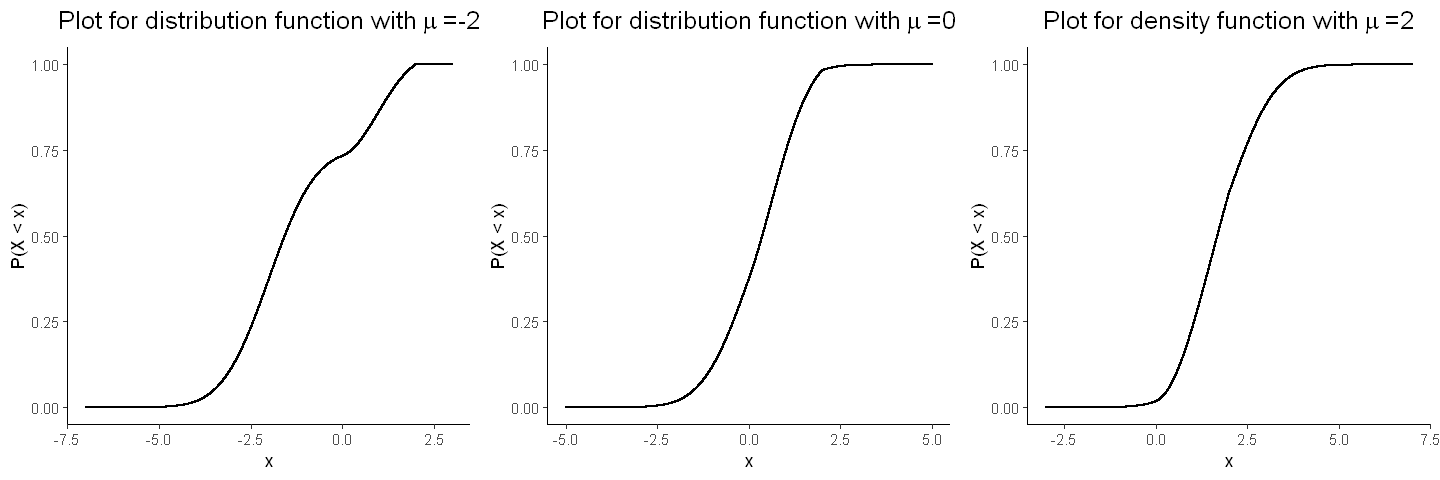

In [83]:
options(repr.plot.width=12, repr.plot.height=4)
x_value1 = seq(-7, 3, by = 0.001)
distribution1 = pfunction(x_value1, mu = -2)
df4 = as.data.frame(cbind(x_value = x_value1, y_value = distribution1))
f4 = ggplot(data = df4, aes(x = x_value, y = y_value))+
    geom_point(size = 0.25)+
    theme_classic()+
    labs(title = expression('Plot for distribution function with'~mu~'=-2'), x = 'x', y = 'P(X < x)')+
    theme(plot.title = element_text(size = 15, hjust = 0.5))

x_value2 = seq(-5, 5, by = 0.001)
distribution2 = pfunction(x_value2, mu = 0)
df5 = as.data.frame(cbind(x_value = x_value2, y_value = distribution2))
f5 = ggplot(data = df5, aes(x = x_value, y = y_value))+
    geom_point(size = 0.25)+
    theme_classic()+
    labs(title = expression('Plot for distribution function with'~mu~'=0'), x = 'x', y = 'P(X < x)')+
    theme(plot.title = element_text(size = 15, hjust = 0.5))

x_value3 = seq(-3, 7, by = 0.001)
distribution3 = pfunction(x_value3, mu = 2)
df6 = as.data.frame(cbind(x_value = x_value3, y_value = distribution3))
f6 = ggplot(data = df6, aes(x = x_value, y = y_value))+
    geom_point(size = 0.25)+
    theme_classic()+
    labs(title = expression('Plot for density function with'~mu~'=2'), x = 'x', y = 'P(X < x)')+
    theme(plot.title = element_text(size = 15, hjust = 0.5))

ggarrange(f4, f5, f6, ncol = 3)


#### Plot for quantile function for each of $\mu = -2$, 0 and 2.

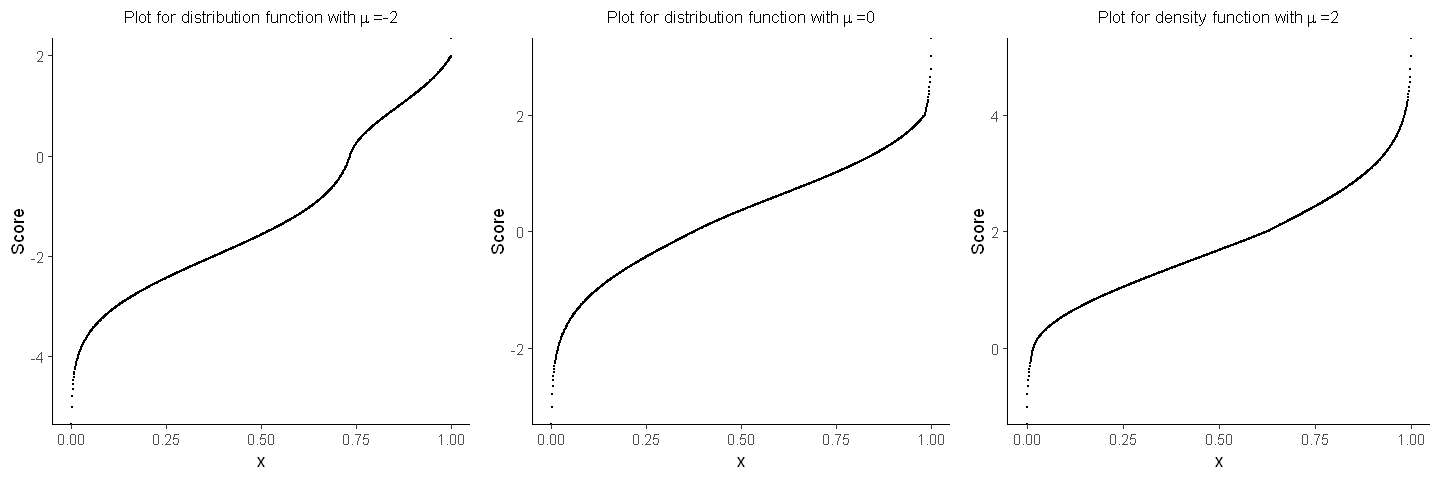

In [87]:
options(repr.plot.width=12, repr.plot.height=4)
quan_value = seq(0, 1, by = 0.001)
quantile1 = qfunction(quan_value, mu = -2)
df7 = as.data.frame(cbind(x_value = quan_value, y_value = quantile1))
f7 = ggplot(data = df7, aes(x = x_value, y = y_value))+
    geom_point(size = 0.25)+
    theme_classic()+
    labs(title = expression('Plot for distribution function with'~mu~'=-2'), x = 'x', y = 'Score')+
    theme(plot.title = element_text(size = 10, hjust = 0.5))

quantile2 = qfunction(quan_value, mu = 0)
df8 = as.data.frame(cbind(x_value = quan_value, y_value = quantile2))
f8 = ggplot(data = df8, aes(x = x_value, y = y_value))+
    geom_point(size = 0.25)+
    theme_classic()+
    labs(title = expression('Plot for distribution function with'~mu~'=0'), x = 'x', y = 'Score')+
    theme(plot.title = element_text(size = 10, hjust = 0.5))

quantile3 = qfunction(quan_value, mu = 2)
df9 = as.data.frame(cbind(x_value = quan_value, y_value = quantile3))
f9 = ggplot(data = df9, aes(x = x_value, y = y_value))+
    geom_point(size = 0.25)+
    theme_classic()+
    labs(title = expression('Plot for density function with'~mu~'=2'), x = 'x', y = 'Score')+
    theme(plot.title = element_text(size = 10, hjust = 0.5))

ggarrange(f7, f8, f9, ncol = 3)

### Monte Carlo simulation for   $E(\frac{X_1 - X_2}{1 + |X_3|})$

<p style = 'font-family:Times New Roman'>
$X_1$, $X_2$ and $X_3$ are independently drawn from the above distribution. Accoring to the property of expectation: 
<p style = 'text-align:center'>    
    $E(\frac{X_1 - X_2}{1 + |X_3|})$

<p style = 'font-family:Times New Roman'>
According to LLN, as long as n is big enough, $\sum^{n}_{i=1}\frac{X_{1i} - X_{2i}}{1 + |X_{3i}|}$ would converge to $E(\frac{X_1 - X_2}{1 + |X_3|})$ in probability.

* Step 1 
<p style = 'font-family:Times New Roman'>
Let's firstly define a function for simulating the process of drawing $X_1,X_2$ and $X_3$ independently from the above distribution.

In [107]:
draw_variables = function(mu =  -1){
    x1 = rfunction(1, mu)
    x2 = rfunction(1, mu)
    x3 = rfunction(1, mu)
#Or we can get 3 values from the generating function one at a time by using rfunction(3, mu)
    return(c(x1, x2, x3))
}

* Step 2
<p style = 'font-family: Times New Roman'>    
Construct the term inside $E(·)$

In [129]:
expected_value = function(n){
    ls = replicate(n, draw_variables())
    term = (ls[1,] - ls[2, ]) / (1 + abs(ls[3,]))
    result = mean(term)
    se = sd(term)
    return(c(Estimate = result, Se = se))
}

In [132]:
n_100 = expected_value(100)
n_1000 = expected_value(1000)
n_10000 = expected_value(10000)
n_100000 = expected_value(100000)
n_1000000 = expected_value(1000000)
result = rbind(n_100, n_1000, n_10000, n_100000, n_1000000)
result

,Estimate,Se
n_100,0.0297463224,0.9939462
n_1000,-0.0328266387,0.9913811
n_10000,0.0163322640,0.9792176
n_100000,-0.0004295298,0.9930791
n_1000000,0.0006272916,0.9936203


### Look for the estimate for $\mu$

* Step 1
<p style = 'font-family:Times New Roman'>
Import data from file and convert it to atomic vector

In [183]:
data = read.csv('D:/LSE File/Course/ST425 Statistical Inference Principles, Methods and Computation/Project Work/mData2021.txt', head = FALSE)[,1]

* Step 2
<p style = 'font-family:Times New Roman'>
Define a likelihood function:
$L(\mu) = \Pi^{n}_{i=1}f(x_i; \mu)$

In [176]:
likelihood = function(x, data) prod(dfunction(data, mu = x))

* Step 3
<p style = 'font-family:Times New Roman'>
Use optimize() function to get a value that can maximize likelihood function as the MLE.

In [189]:
mle = optimize(likelihood, c(-10, 10), maximum = T, tol = 0.000000000000001, data = data)$maximum
cat('The maximum likelihood estimate for mu is mu',mle, '.')

The maximum likelihood estimate for mu is mu 1.719065 .